In [3]:
import requests
import bs4
import re
from time import sleep
import random
import networkx as nx

When you look at a website using a web browser what you see is a rendered view from an HTML code. This graphical version is much easier for us to read, however, it's not trivial to automatize the process of any data retrieval from it. That's why we will use raw HTML form

The first step is to download the content. We can use a request library. Basic usage is very simple.

In [2]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')
response.status_code # it's wise to check the status code 

200

In [3]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Poznań University of Technology - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

Working with such a string might be problematic. However, HTML is structured and we can benefit from it. The Beautiful Soup package transforms HTML string into a tree form and allows us to query it in a much more efficient and easier way.

In [4]:
parsed = bs4.BeautifulSoup(response.text)
parsed

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Poznań University of Technology - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clie

Typically text content is stored in a paragraph element denoted with a 'p' tag. We can take a look at the text from all paragraphs.

In [5]:
for p in parsed.select('p'):
    print(p.getText())



Poznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1,100 academic staff.

There are nine faculties (since 2020):

Poznan University of Technology (PUT)

## Task1
Implement a function getText(url) 
 - download content from a given url
 - transform it using bs
 - return text from all paragraphs

In [6]:
def getText(url):
    page = requests.get(url)
    soup = bs4.BeautifulSoup(page.content, "html.parser")
    par = soup.find_all('p')
    par = [p.text for p in par]
    output = ' '.join(par)
    
    return output

In [7]:
getText('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

"\n Poznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6\xa0MHz. The university has over 21,000 students and over 1,100 academic staff.\n There are nine faculties (since 2020):\n Poznan University of Technolog

In [8]:
getText("http://wp.pl")

''

Nowadays websites are often dynamic, not static. Working with them would require dealing with javascript. It's possible and there are python packages supporting this processing but we will not cover them in this course.

In [9]:
getText("http://facebook.com")

''

## Task 2
Extract number of students from infobox table

In [10]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')
parsed = bs4.BeautifulSoup(response.text)
parsed.find('table')

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Special

In this task, you have to extract specific information from a specific table. The table we are interested in is of class infobox and bs allows us to use this information.

In [11]:
parsed.find('table', class_="infobox")

<table class="infobox vcard"><caption class="infobox-title fn org">Poznań University of Technology</caption><tbody><tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr><tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" tit

Since bs creates a tree structure you can navigate through it and use methods find and find_all on the next nodes.

In [12]:
parsed.find('table', class_="infobox").find_all("tr")

[<tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr>,
 <tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" title="Rector (academia)">Rector</a></th><td class="infobox-data">PhD, Prof. Teofil Jesionowski</td></

In [13]:
parsed.find('table', class_="infobox").find_all("tr")[6]

<tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Students</th><td class="infobox-data">14,138<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup> <small>(12.2023)</small></td></tr>

In [14]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('th').text

'Students'

In [15]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('td').text

'14,138[1] (12.2023)'


Write a function that returns the number of students from the infobox table from the provided URL. You can use inspect tool - just right click on a website, choose inspect and analyze the html structure.

In [16]:
def getStudentCount(url):
    page = requests.get(url)
    soup = bs4.BeautifulSoup(page.content, "html.parser")
    rows = soup.find('table', class_='infobox').find_all('tr')

    ths = [i.find('th').text if i.find('th') is not None else None for i in rows]
    tds = [i.find('td').text if i.find('td') is not None else None for i in rows]

    nr_of_students = tds[ths.index('Students')].split()[0]
    nr_of_students = int(nr_of_students[:nr_of_students.index('[')].replace(',', ''))

    return nr_of_students

In [17]:
assert getStudentCount("https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology") == 14138

In [18]:
assert getStudentCount("https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology") == 20970

# Regex
Regular expression is a scheme for defining patterns to be found in a text

Let's try it  https://regexone.com/

## Task 3

We can also retrieve URLs and once we have them we can scrape them as well.

In [19]:
parsed.find_all('a')

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="/wiki/Help:Contents" title="Guidance on how to use and edit Wikipedia"><span>Help</span></a>,
 <a href="/wiki/Help:Introduction" title="Learn how to edit Wikipedia"><span>Learn to edit</span></a>,
 <a href="/wiki/Wikipedia:Community_portal" title="The

It's important to add some delay between accessing the next page. Otherwise, you might cause too much traffic and be temporarily banned

In [20]:
links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')}) # find all links starting with /wiki
random.shuffle(links)
for link in links[:10]:
    print(link['href'])
    try:
        response = requests.get("https://en.wikipedia.org" + link['href'])
        print(response.status_code)
        sleep(random.random()*3)
    except:
        continue

/wiki/Medical_University_of_%C5%81%C3%B3d%C5%BA
200
/wiki/Help:Category
200
/wiki/Help:Introduction
200
/wiki/Category:1955_establishments_in_Poland
200
/wiki/Category:Articles_using_infobox_university
200
/wiki/Category:Short_description_matches_Wikidata
200
/wiki/Institut_national_des_sciences_Appliqu%C3%A9es_de_Lyon
200
/wiki/Ghent_University
200
/wiki/Institute_of_Electrical_and_Electronics_Engineers
200
/wiki/Special:MyTalk
200


implement DFS based on the code above, try to avoid links not leading to an article

In [21]:
def dfs(link):
    visited = [link]
    to_visit = list()

    print(f"Current link: {link}")
    
    response = requests.get(link)
    parsed = bs4.BeautifulSoup(response.text, "html.parser")

    excluded = r'Main_Page|Wikipedia|Portal|Special|Help|Talk|File|User|Category|disambiguation|#|Template|:'

    to_visit_dup = ["https://en.wikipedia.org" + i['href'] for i in parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})] # find all links starting with /wiki that are articles
    to_visit_dup = [i for i in to_visit_dup if not re.search(excluded, i) and i not in visited]
    to_visit = []

    for i in to_visit_dup:
        if i not in to_visit:
            to_visit.append(i)

    while len(to_visit) > 0 and len(visited) < 25:
        curr_node = to_visit.pop(0)
        visited.append(curr_node)
        # print(f"Current link: {curr_node}")
        try:
            response = requests.get(curr_node)
            parsed = bs4.BeautifulSoup(response.text)

            neighbs = ["https://en.wikipedia.org" + i['href'] for i in parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})]
            neighbors = []

            for i in neighbs:
                if i not in neighbors:
                    neighbors.append(i)

            to_visit = [i for i in neighbors if i not in visited and not re.search(excluded, i)] + [i for i in to_visit if i not in neighbors]

            sleep(random.random()*2)
        except:
            # print("Failed")
            to_visit = [curr_node] + to_visit
            visited.pop()
    return visited

In [100]:
dfs_order = dfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

Current link: https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology
Current link: https://en.wikipedia.org/wiki/Geographic_coordinate_system
Current link: https://en.wikipedia.org/wiki/Spatial_reference_system
Current link: https://en.wikipedia.org/wiki/Geodesy
Current link: https://en.wikipedia.org/wiki/Geodesic
Current link: https://en.wikipedia.org/wiki/Geodesic_(general_relativity)
Current link: https://en.wikipedia.org/wiki/Geodesics_in_general_relativity
Current link: https://en.wikipedia.org/wiki/Geodesics
Current link: https://en.wikipedia.org/wiki/Earth_geodesic
Current link: https://en.wikipedia.org/wiki/Earth_geodesic
Current link: https://en.wikipedia.org/wiki/Geodesics_on_an_ellipsoid
Current link: https://en.wikipedia.org/wiki/Geodynamics
Current link: https://en.wikipedia.org/wiki/Geomatics
Current link: https://en.wikipedia.org/wiki/Geoinformatics
Current link: https://en.wikipedia.org/wiki/Leaflet_(software)
Current link: https://en.wikipedia.org/wiki/Prog

write BFS with printing current link

In [22]:
def bfs(link):
    visited = [link]
    to_visit = list()

    print(f"Current link: {link}")
    
    response = requests.get(link)
    parsed = bs4.BeautifulSoup(response.text, "html.parser")

    excluded = r'Main_Page|Wikipedia|Portal|Special|Help|Talk|File|User|Category|disambiguation|#|Template'

    to_visit_dup = ["https://en.wikipedia.org" + i['href'] for i in parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})] # find all links starting with /wiki that are articles
    to_visit_dup = [i for i in to_visit_dup if not re.search(excluded, i) and i not in visited]
    to_visit = []

    for i in to_visit_dup:
        if i not in to_visit:
            to_visit.append(i)

    while len(to_visit) > 0 and len(visited) < 100:
        curr_node = to_visit.pop(0)
        visited.append(curr_node)
        try:
            response = requests.get(curr_node)
            parsed = bs4.BeautifulSoup(response.text)

            neighbs = ["https://en.wikipedia.org" + i['href'] for i in parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})]
            neighbors = []

            for i in neighbs:
                if i not in neighbors:
                    neighbors.append(i)

            to_visit = to_visit + [i for i in neighbors if i not in visited and i not in to_visit and not re.search(excluded, i)]

            sleep(random.random() * 2)
        except:
            to_visit = [curr_node] + to_visit
            visited.pop()
    return visited

In [64]:
bfs_order = bfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

Current link: https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology


In [65]:
print(len(bfs_order) == len(set(bfs_order)))
bfs_order.sort()
bfs_order

True


['https://en.wikipedia.org/wiki/AGH_University_of_Science_and_Technology',
 'https://en.wikipedia.org/wiki/Adam_Mickiewicz_University_in_Pozna%C5%84',
 'https://en.wikipedia.org/wiki/Aleksander_Doba',
 'https://en.wikipedia.org/wiki/Andrzej_Jajszczyk',
 'https://en.wikipedia.org/wiki/Bialystok_University_of_Technology',
 'https://en.wikipedia.org/wiki/CESAER_Association',
 'https://en.wikipedia.org/wiki/Cardinal_Stefan_Wyszy%C5%84ski_University_in_Warsaw',
 'https://en.wikipedia.org/wiki/College_and_university_rankings',
 'https://en.wikipedia.org/wiki/Computer_Science',
 'https://en.wikipedia.org/wiki/Computer_scientist',
 'https://en.wikipedia.org/wiki/Conference_of_European_Schools_for_Advanced_Engineering_Education_and_Research',
 'https://en.wikipedia.org/wiki/Cz%C4%99stochowa_University_of_Technology',
 'https://en.wikipedia.org/wiki/EAIE',
 'https://en.wikipedia.org/wiki/Electrical_Engineering',
 'https://en.wikipedia.org/wiki/European_Credit_Transfer_System',
 'https://en.wikip

## Networkx

It's a package for working with various networks

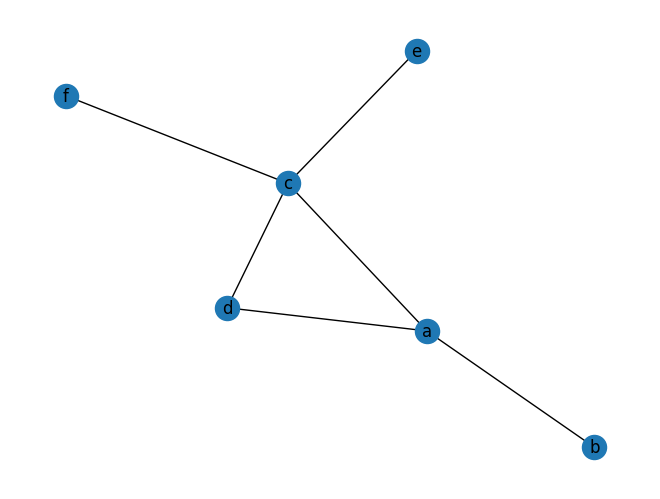

In [23]:
G = nx.Graph()

G.add_edge("a", "b")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e")
G.add_edge("c", "f")
G.add_edge("a", "d")

nx.draw(G, with_labels=True)


Can you plot a graph of Wikipedia links? Extend the bfs function by plotting a network. Limit the search to a reasonable number of nodes.

In [12]:
def bfs_plot(link, nr_of_nodes):
    visited = [link]
    to_visit = list()
    G = nx.Graph()

    print(f"Current link: {link}")
    
    response = requests.get(link)
    parsed = bs4.BeautifulSoup(response.text, "html.parser")

    excluded = r'Main_Page|Wikipedia|Portal|Special|Help|Talk|File|User|Category|disambiguation|#|Template'

    to_visit_dup = ["https://en.wikipedia.org" + i['href'] for i in parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})] # find all links starting with /wiki that are articles
    to_visit_dup = [i for i in to_visit_dup if not re.search(excluded, i) and i not in visited]
    to_visit = []

    for i in to_visit_dup:
        if i not in to_visit and len(to_visit) + 1 < nr_of_nodes:
            to_visit.append(i)
            if G.number_of_nodes() < nr_of_nodes:
                G.add_edge(link, i)

    while len(to_visit) > 0:
        curr_node = to_visit.pop(0)
        if len(visited) > nr_of_nodes and curr_node not in G.nodes:
            continue

        visited.append(curr_node)
        try:
            response = requests.get(curr_node)
            parsed = bs4.BeautifulSoup(response.text)

            neighbs = ["https://en.wikipedia.org" + i['href'] for i in parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')})]
            neighbors = []

            for i in neighbs:
                if i not in neighbors:
                    neighbors.append(i)
                    if (G.number_of_nodes() < nr_of_nodes or (i in G and curr_node in G) and curr_node != i):
                        G.add_edge(curr_node, i)

            to_visit = to_visit + [i for i in neighbors if i not in visited and i not in to_visit and not re.search(excluded, i)]

            sleep(random.random() * 2)
        except:
            to_visit = [curr_node] + to_visit
            visited.pop()
    
    nx.draw(G, with_labels = True, font_size = 5)
    return visited

Current link: https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology


['https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology',
 'https://en.wikipedia.org/wiki/Geographic_coordinate_system',
 'https://en.wikipedia.org/wiki/Latin_language',
 'https://en.wikipedia.org/wiki/Public_university',
 'https://en.wikipedia.org/wiki/Rector_(academia)',
 'https://en.wikipedia.org/wiki/Pozna%C5%84',
 'https://en.wikipedia.org/wiki/Greater_Poland_Voivodeship',
 'https://en.wikipedia.org/wiki/Poland',
 'https://en.wikipedia.org/wiki/Spatial_reference_system']

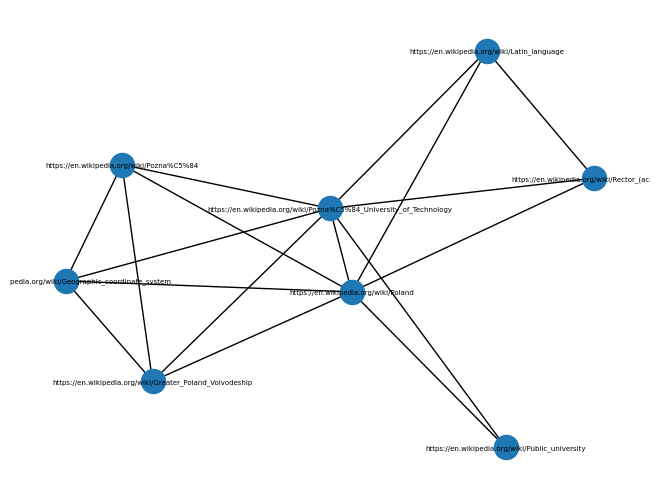

In [14]:
bfs_plot('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology', 8)

# Scrapy

Scrapy is an efficient library for web crawling and scraping. It has a slightly higher entrance level than requests + bs but it's much easier for complex tasks.

In [67]:
import requests
import bs4
import re
from time import sleep
import random

import scrapy
from scrapy.crawler import CrawlerProcess

In [68]:
class MySpider(scrapy.Spider):
    name = "lab1"

    start_urls = ['http://quotes.toscrape.com']

    def parse(self, response):
        quotes = response.css('div.quote')
        for quote in quotes: # you can extract data you need
            yield {
                'text': quote.css('.text::text').get(),
                'author': quote.css('.author::text').get(),
            }

        next_page = response.css('li.next a::attr(href)').get() #find next URL

        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse) #and process it

In [69]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider)
process.start() 

2024-11-24 01:46:18 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: scrapybot)
2024-11-24 01:46:18 [scrapy.utils.log] INFO: Versions: lxml 5.2.2.0, libxml2 2.12.6, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.10.0, Python 3.9.6 (default, Oct  4 2024, 08:01:31) - [Clang 16.0.0 (clang-1600.0.26.4)], pyOpenSSL 24.2.1 (OpenSSL 3.2.2 4 Jun 2024), cryptography 42.0.8, Platform macOS-15.1-arm64-arm-64bit
2024-11-24 01:46:18 [scrapy.addons] INFO: Enabled addons:
[]
2024-11-24 01:46:18 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2024-11-24 01:46:18 [scrapy.extensions.telnet] INFO: Telnet Password: 95c7c11b64a917f4
2024-11-24 01:46:18 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2024-11-24 01:46:18 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (com

## Additional task

Which color of a car is the most expensive? Analyze offers from https://www.olx.pl/motoryzacja/samochody/ some of them leads to olx while other to otomoto. Can you use data from both sources?

<details>

<summary>Bonus</summary>

Funny website for scraping https://web.archive.org/web/20190615072453/https://sirius.cs.put.poznan.pl/~inf66204/WKC.html
</details>